## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
x_train = pd.read_csv("x_train.csv").values
y_train = pd.read_csv("y_train.csv").values[:,0]
x_test = pd.read_csv("x_test.csv").values
y_test = pd.read_csv("y_test.csv").values[:,0]

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(750, 2)
(750,)
(250, 2)
(250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [4]:
## Your code HERE

# m1: mean vector of class1(label 0)
# m2: mean vector of class2(label 1)
m1 = np.mean(x_train[y_train == 0], axis=0)
m2 = np.mean(x_train[y_train == 1], axis=0)

In [5]:
print(f"mean vector of class 1: {m1}")
print(f"mean vector of class 2: {m2}")

mean vector of class 1: [2.47107265 1.97913899]
mean vector of class 2: [1.82380675 3.03051876]


## 2. Compute the Within-class scatter matrix SW
$S_{W} = \sum \limits _{n \in C_{1}} (X_{n} - m_{1})(X_{n} - m_{1})^T + \sum \limits _{n \in C_{2}} (X_{n} - m_{2})(X_{n} - m_{2})^T$

In [6]:
## Your code HERE

# get class1 and class2 data
x1 = x_train[y_train == 0]
x2 = x_train[y_train == 1]

# output shape is 2*2, so I use the transpose matrix of x-m mutply x-m to get 2*2 result.
sw1 = np.matmul((x1-m1).T, (x1-m1))
sw2 = np.matmul((x2-m2).T, (x2-m2))
sw = sw1 + sw2

In [7]:
assert sw.shape == (2,2)
print(f"Within-class scatter matrix SW: \n{sw}")

Within-class scatter matrix SW: 
[[140.40036447  -5.30881553]
 [ -5.30881553 138.14297637]]


## 3.  Compute the Between-class scatter matrix SB
$S_{B} = (m_{2} - m_{1})(m_{2} - m_{1})^T$

In [8]:
## Your code HERE

# reshape 1D(2,) to 2D(2,1) so that can get the output shape (2,2)
sb = np.matmul((m2 - m1).reshape(2, 1), (m2 - m1).reshape(2, 1).T)

In [9]:
assert sb.shape == (2,2)
print(f"Between-class scatter matrix SB: \n{sb}")

Between-class scatter matrix SB: 
[[ 0.41895314 -0.68052227]
 [-0.68052227  1.10539942]]


## 4. Compute the Fisher’s linear discriminant
$w$ is the eigenvector of $S_{W}^{-1}S_{B}$ that corresponds to the largest eigenvalue

In [10]:
## Your code HERE

sw_inv = np.linalg.inv(sw)
eigenvalue, eigenvector = np.linalg.eig(np.matmul(sw_inv, sb))

# set w to eigenvector that correspons to the largest eigenvalue
max_eigenvalue_idx = np.argmax(eigenvalue)
w = eigenvector[:, max_eigenvalue_idx]
w = w.reshape(2,1)

In [11]:
assert w.shape == (2,1)
print(f" Fisher's linear discriminant: \n{w}")

 Fisher's linear discriminant: 
[[ 0.50266214]
 [-0.86448295]]


## 5. Project the test data by linear discriminant and get the class prediction by nearest-neighbor rule.  Calculate the accuracy score 
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [12]:
# Predict y by K-nearest-neighbor
# By experiment, use K = 1 only get accuracy = 0.88, and use K = 5 can get accuracy > 0.9
K = 5
train = np.matmul(x_train, w)
test = np.matmul(x_test, w)
y_pred = []

for i in range(len(test)):
    distance = np.linalg.norm(train - test[i], axis=1)
    nearest_neighbor_ids = distance.argsort()[:K]
    neighbor_label = list(y_train[nearest_neighbor_ids])
    pred = max(neighbor_label, key=neighbor_label.count)
    y_pred.append(pred)

In [13]:
acc = accuracy_score(y_test, y_pred)

In [14]:
print(f"Accuracy of test-set {acc}")

Accuracy of test-set 0.904


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

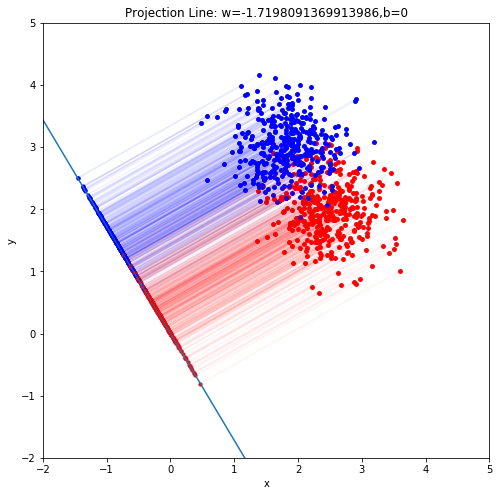

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
plt.xlim(-2, 5)
plt.ylim(-2, 5)

# draw projection line with intercept = 2
slope = (w[1][0] / w[0][0])
x = np.linspace(-2, 4, 50)
y = x * slope

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Projection Line: w={slope},b=0')

# plot class1 training data 
x_c1, y_c1 = x_train[y_train == 0][:, 0], x_train[y_train == 0][:, 1]
plt.scatter(x_c1, y_c1, color='red', s=15, label='class1')

# plot class1 training data 
x_c2, y_c2 = x_train[y_train == 1][:, 0], x_train[y_train == 1][:, 1]
plt.scatter(x_c2, y_c2, color='blue', s=15, label='class2')

# project training data
w = np.squeeze(w)
for i in range(len(x_train)):
    projection = (np.dot(x_train[i], w) / np.dot(w, w)) * w
    if y_train[i] == 0:
        plt.scatter(projection[0], projection[1], s=10, color='red')
        plt.plot([x_train[i][0], projection[0]], [x_train[i][1], projection[1]], c='red', alpha=0.05)
    else:
        plt.scatter(projection[0], projection[1], s=10, color='blue')
        plt.plot([x_train[i][0], projection[0]], [x_train[i][1], projection[1]], c='blue', alpha=0.05)

